In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
x_train.shape

#50000 - images 
# 32 * 32 pixels
#3 for RGB

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

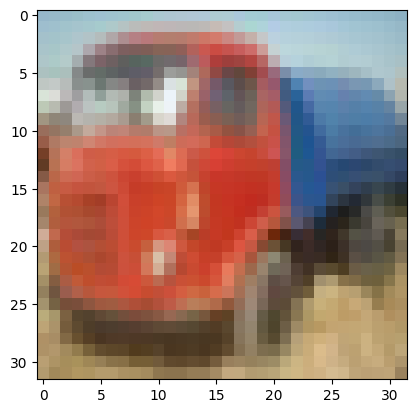

In [11]:
plt.imshow(x_train[102])

#Its is a truck

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
def example (x, y, index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

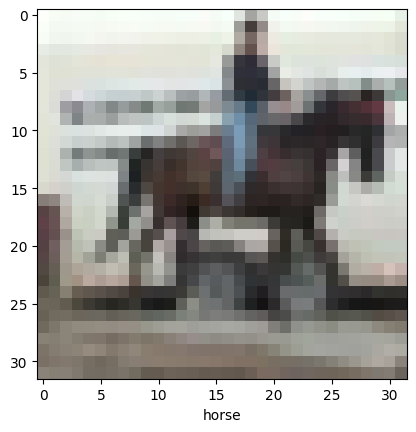

In [22]:
example(x_train, y_train, 9821)

In [23]:
#Normalizing the data by dividing it by 255 as it will give us the values between 0 and 1

x_train = x_train / 255
x_test = x_test / 255

In [29]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(x_train, y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8129 - accuracy: 0.3534
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6249 - accuracy: 0.4253
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5399 - accuracy: 0.4557
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4814 - accuracy: 0.4788
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4328 - accuracy: 0.4948
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3889 - accuracy: 0.5098
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3534 - accuracy: 0.5261
Epoch 8/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3147 - accuracy: 0.5374
Epoch 9/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2862 - accuracy: 0.5481
Epoch 10/100
1563/1563 [==============================] - 7s 4ms/step - l

In [30]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1729 - accuracy: 0.5791


[2.1729094982147217, 0.5791000127792358]

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report : \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.69      0.67      1000
           1       0.66      0.68      0.67      1000
           2       0.41      0.55      0.47      1000
           3       0.41      0.42      0.41      1000
           4       0.57      0.43      0.49      1000
           5       0.50      0.44      0.47      1000
           6       0.63      0.64      0.64      1000
           7       0.64      0.64      0.64      1000
           8       0.70      0.69      0.69      1000
           9       0.61      0.58      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



In [ ]:
#In the ANN model, the accuracy of the training data is around 99%, but for actual testing, it gives only about 57% accuracy, this is overfitting

In [32]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),


    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

In [33]:
cnn.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 10s 3ms/step - loss: 1.9048 - accuracy: 0.3232
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5672 - accuracy: 0.4471
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3801 - accuracy: 0.5104
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2729 - accuracy: 0.5525
Epoch 5/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2044 - accuracy: 0.5773
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1477 - accuracy: 0.5988
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1004 - accuracy: 0.6180
Epoch 8/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0559 - accuracy: 0.6313
Epoch 9/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0141 - accuracy: 0.6475
Epoch 10/100
1563/1563 [==============================] - 5s 3ms/step - 

In [34]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 2.7653 - accuracy: 0.6349


[2.7652971744537354, 0.6348999738693237]

In [36]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

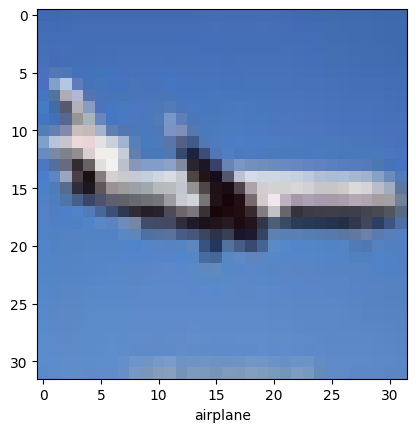

In [46]:
example(x_test, y_test, 235)

In [47]:
y_pred = cnn.predict(x_test)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([[6.7776362e-13, 1.0896353e-09, 8.9638136e-10, 9.9954778e-01,
        4.4866907e-04, 2.1451160e-06, 8.9888196e-08, 1.4214382e-11,
        4.9507909e-09, 1.3192581e-06],
       [1.1268030e-08, 8.2674569e-01, 1.0654162e-23, 8.3781667e-23,
        7.1671566e-15, 9.5370049e-24, 3.2326635e-28, 6.5206777e-20,
        1.7325433e-01, 3.0581548e-10],
       [9.7283518e-01, 6.1923726e-07, 5.6118989e-08, 2.3046530e-11,
        6.1944847e-06, 1.2525715e-07, 3.1314351e-17, 5.9455812e-10,
        2.7069163e-02, 8.8808047e-05],
       [9.1215241e-01, 1.3002175e-03, 6.6984282e-04, 2.5146991e-07,
        2.7975574e-08, 1.1615950e-13, 6.9029625e-08, 2.6483709e-12,
        8.5877068e-02, 7.2557029e-08],
       [2.1965381e-19, 1.3734090e-10, 1.2251621e-07, 2.3513155e-04,
        9.9887937e-01, 2.6968181e-09, 8.8537799e-04, 3.7519950e-17,
        2.2717807e-16, 3.8599064e-16],
       [1.5897703e-13, 4.0581402e-10, 4.7461118e-10, 5.8251603e-06,
        2.1914573e-11, 5.7939901e-06, 9.9998832e-01, 7.27

In [48]:
np.argmax(y_pred[0])

3

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 1, 0, 0, 4, 6, 1, 2, 3, 1]

In [50]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

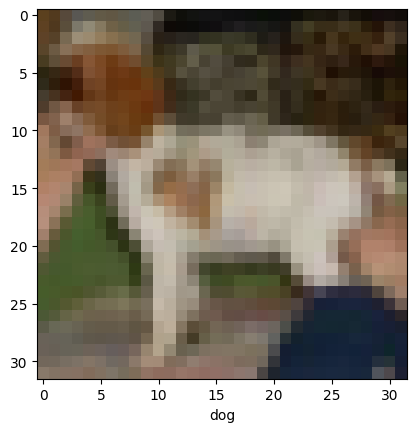

In [58]:
example(x_test, y_test, 12)

In [59]:
classes[y_classes[12]]

'dog'

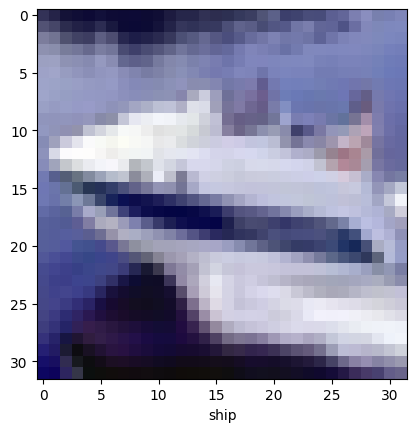

In [67]:
example(x_test, y_test, 1213)

In [68]:
classes[y_classes[1213]]

'automobile'

In [69]:
print('Classification Report : \n', classification_report(y_test, y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.70      0.69      1000
           1       0.74      0.74      0.74      1000
           2       0.52      0.51      0.52      1000
           3       0.44      0.43      0.44      1000
           4       0.58      0.58      0.58      1000
           5       0.53      0.53      0.53      1000
           6       0.71      0.73      0.72      1000
           7       0.69      0.68      0.69      1000
           8       0.76      0.75      0.75      1000
           9       0.70      0.69      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

